In [14]:
# Python
import pandas as pd
from fbprophet import Prophet

In [15]:
df = pd.read_excel('Total_final.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)
df.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [16]:
df_day=df.resample(rule='D').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [17]:
df_day.tail()

,ds,y
332,2020-08-28,78551.1
333,2020-08-29,78011.7
334,2020-08-30,77128.5
335,2020-08-31,77797.2
336,2020-09-01,789.6


In [18]:
df_day.drop(df_day.index[336], inplace=True)

In [19]:
df_day.tail()

,ds,y
331,2020-08-27,79910.1
332,2020-08-28,78551.1
333,2020-08-29,78011.7
334,2020-08-30,77128.5
335,2020-08-31,77797.2


In [20]:
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(df_day)

In [25]:
future = m.make_future_dataframe(30, freq='D') # Forecasting 7 days
future.tail()

,ds
361,2020-09-26
362,2020-09-27
363,2020-09-28
364,2020-09-29
365,2020-09-30


In [26]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
361,2020-09-26,76694.307252,75068.057972,78188.948021
362,2020-09-27,76691.801165,75176.412256,78327.455433
363,2020-09-28,76657.317403,75071.902920,78299.677034
364,2020-09-29,76901.020818,75450.251394,78433.240209
365,2020-09-30,77013.206141,75493.005305,78483.183919


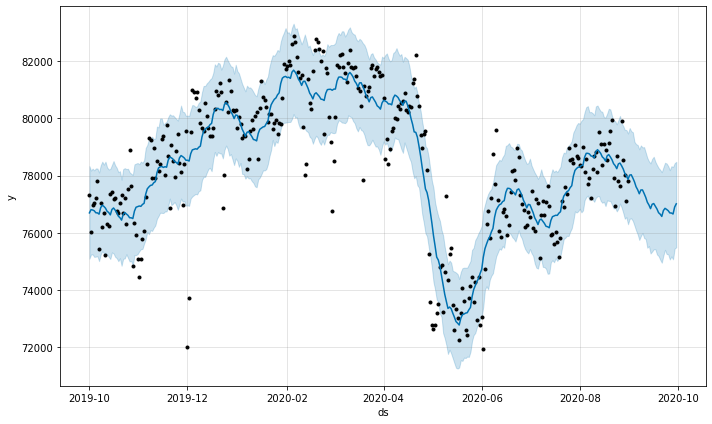

In [27]:
fig1 = m.plot(forecast)

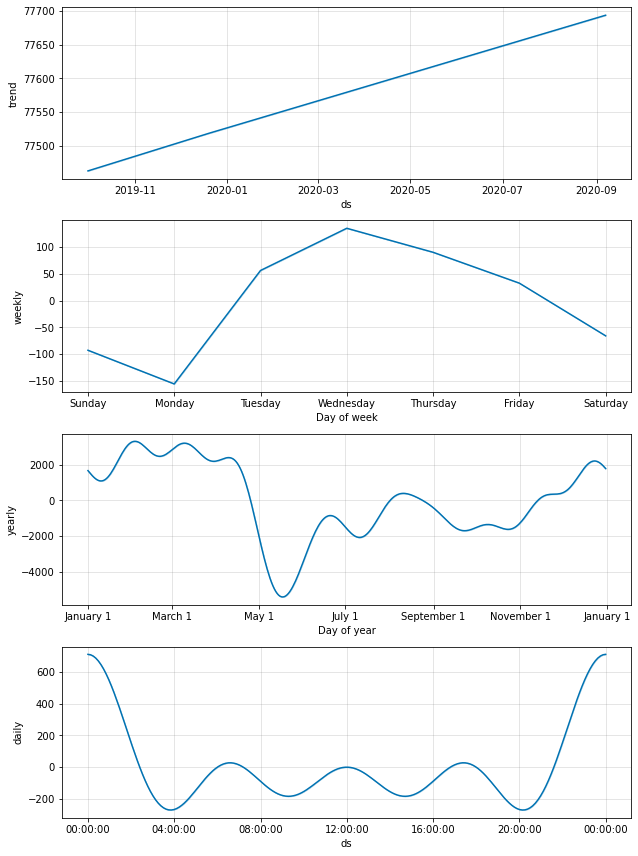

In [11]:
fig2 = m.plot_components(forecast)

In [12]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

#py.init_notebook_mode(connected=True)
py.offline.init_notebook_mode(connected=True)
#py.init_notebook_mode()

In [13]:
fig = plot_plotly(m, forecast)  # This returns a plotly Figure

py.iplot(fig)